### 주제분석(LSA)를 위한 전처리

In [2]:
!wget -c https://github.com/euphoris/datasets/raw/master/neurips.zip

# import wget
# wget.download('https://github.com/euphoris/datasets/raw/master/neurips.zip')

--2022-10-28 14:32:33--  https://github.com/euphoris/datasets/raw/master/neurips.zip
github.com (github.com) 해석 중... 20.200.245.247
다음으로 연결 중: github.com (github.com)|20.200.245.247|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 302 Found
위치: https://raw.githubusercontent.com/euphoris/datasets/master/neurips.zip [따라감]
--2022-10-28 14:32:33--  https://raw.githubusercontent.com/euphoris/datasets/master/neurips.zip
raw.githubusercontent.com (raw.githubusercontent.com) 해석 중... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
다음으로 연결 중: raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 416 Range Not Satisfiable

    이미 파일을 완전히 전송했습니다. 할 일 없음.



In [3]:
import pandas as pd

df = pd.read_csv('neurips.zip')
df.head()

,year,title,abstract
0,2007,Competition Adds Complexity,It is known that determinining whether a DEC-P...
1,2007,Efficient Principled Learning of Thin Junction...,We present the first truly polynomial algorith...
2,2007,Regularized Boost for Semi-Supervised Learning,Semi-supervised inductive learning concerns ho...
3,2007,Simplified Rules and Theoretical Analysis for ...,We show that under suitable assumptions (prima...
4,2007,Predicting human gaze using low-level saliency...,"Under natural viewing conditions, human observ..."


In [4]:
df.tail()

,year,title,abstract
3915,2017,"On Separability of Loss Functions, and Revisit...",We revisit the classical analysis of generativ...
3916,2017,Maxing and Ranking with Few Assumptions,PAC maximum ...
3917,2017,On clustering network-valued data,"Community detection, which focuses on clusteri..."
3918,2017,A General Framework for Robust Interactive Lea...,We propose a general framework for interactive...
3919,2017,Multi-view Matrix Factorization for Linear Dyn...,We consider maximum likelihood estimation of l...


In [5]:
df.year.unique()

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = TfidfVectorizer(stop_words = 'english', max_features = 2000)

In [10]:
x = cv.fit_transform(df.abstract)
words = cv.get_feature_names()
words

/home/jeon2/anaconda3/envs/study/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


2000

In [20]:
words[:10]

['000',
 '10',
 '100',
 '20',
 '2d',
 '3d',
 'ability',
 'able',
 'absolute',
 'abstract']

### SVD

In [8]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100, random_state=1234) # 100차원으로 축소하겠다

In [9]:
x.shape # 3920개의 문서를 2000개의 단어(차원)로 표현함

(3920, 2000)

In [11]:
# .fit은 분석하는 과정
# .transform은 분석 결과를 바탕으로 변환 후 새로운 뭔가를 만들어 내는 과정

# 결과 1: 문서가 차원과 어떤 관계에 있나?
# 결과 2: 차원과 단어가 어떤 관계에 있나?

svd.fit(x)

TruncatedSVD(n_components=100, random_state=1234)

In [12]:
svd.components_.shape # 결과 2(차원과 단어의 관계가 저장되어 있음)

(100, 2000)

In [13]:
# 0.00483864: 1차원의 값이 1 증가하면 단어가 0.0048만큼 증가함
# 주제 1 값이 1000 정도로 증가하면 해당 단어가 5번 가량 나온다는 것

svd.components_

array([[ 0.00483864,  0.01243762,  0.004755  , ...,  0.00491457,
         0.0162017 ,  0.01160996],
       [-0.0055402 , -0.01859974, -0.00681511, ...,  0.00074343,
         0.0014955 ,  0.00839796],
       [-0.00331551, -0.02285996, -0.00537686, ..., -0.00103497,
         0.00135762, -0.00786135],
       ...,
       [-0.00037104,  0.02843677,  0.00591093, ...,  0.0027189 ,
         0.01184353, -0.01022713],
       [ 0.00286079, -0.02232737, -0.00742612, ...,  0.00374566,
        -0.00553911, -0.00644252],
       [ 0.00840489,  0.00073834,  0.00954845, ..., -0.00397496,
        -0.00763423, -0.00401217]])

In [14]:
len(svd.components_) # 주제 100개

100

In [15]:
word_idx = words.index('topic') # 'topic'이라는 단어와 연관있는 주제들을 알아보자
word_idx

1861

In [18]:
# 마이너스 값의 의미는 topic과 주제가 강해질수록 이 단어는 덜 쓰임
svd.components_[:, word_idx] # 100개. 행은 다 가져오고 열은 1861번째(topic에 해당하는)만 가져옮.

array([ 2.21636837e-02, -3.35006049e-02,  6.34481186e-02, -9.08255574e-03,
       -2.59052356e-02, -3.04093871e-02,  4.31240860e-02, -4.44698174e-02,
       -5.35017435e-02,  2.51650395e-02, -7.43829615e-02, -4.09887607e-02,
        1.43222364e-03,  9.13531186e-02, -5.15778667e-02,  1.43561806e-02,
        1.43079857e-02,  1.08711712e-01, -1.99153193e-02,  9.44076667e-02,
       -1.49543745e-01,  7.67068611e-02, -9.41560593e-02,  1.36303047e-02,
       -4.61174101e-02,  1.04014531e-01,  1.14117206e-01,  1.99617317e-01,
        3.19722162e-02,  6.47920314e-02, -9.24920865e-02,  2.24452596e-02,
        1.25802356e-02,  1.57600255e-02,  3.03693389e-02, -1.57972126e-01,
       -6.85859397e-02, -2.71583590e-02, -4.23475068e-02,  6.59471303e-03,
       -7.82198356e-02,  6.56273694e-02,  1.66759836e-02,  5.84677258e-02,
        1.36793675e-02, -4.11903979e-02,  2.94849115e-02, -2.23744287e-02,
       -7.98992089e-02,  7.03076161e-02, -8.41267895e-02, -9.61470800e-02,
       -6.79298440e-02, -

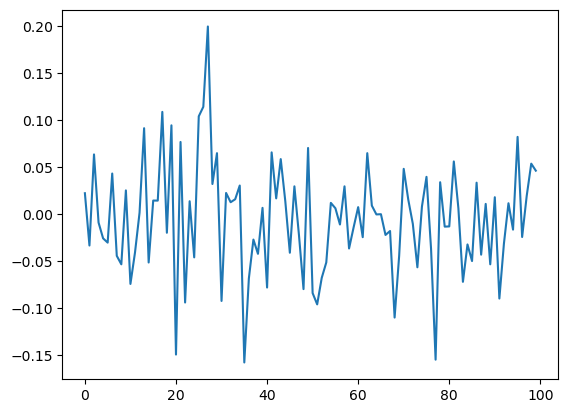

In [21]:
from matplotlib import pyplot

pyplot.plot(svd.components_[:, word_idx])

In [22]:
topic_idx = svd.components_[:, word_idx].argmax()
topic_idx # 27번째 주제가 topic이라는 단어와 가장 연관성이 있다.

27

In [23]:
print(max(svd.components_[:, word_idx]))

0.19961731748834688


In [24]:
svd.components_[:, word_idx][27]

0.19961731748834688

In [25]:
# 주제 27이 다른 단어들과 얼마나 관련이 있는지를 확인
topic = pd.DataFrame({'word': words, 'loading': svd.components_[topic_idx]})
topic.sort_values('loading').tail()

,word,loading
1202,norm,0.119621
804,graph,0.126101
866,image,0.155490
1861,topic,0.199617
1713,sparse,0.211411


### 회전

In [26]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 5.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.5/199.5 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 9.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 kB 9.0 MB/s eta 0:00:00a 0:00:01
  Created wheel for factor_analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42015 sha256=259ea3c1f54d31857b78cf01764c06d2f68717177e297b31f5d6efcf9c54047b
  Stored in directory: /home/jeon2/.cache/pip/wheels/c5/94/da/41abe415f64706710726291086a814dd8b9e0dab1c491ef6ed
Successfully built factor_analyzer


In [28]:
from factor_analyzer.rotator import Rotator

rotator = Rotator()
rot = rotator.fit_transform(svd.components_.T) # .T는 전치행렬. 원래 shape는 (100, 2000)
rot.shape


(2000, 100)

In [40]:
svd.components_.T

array([[ 0.00483864, -0.0055402 , -0.00331551, ..., -0.00037104,
         0.00286079,  0.00840489],
       [ 0.01243762, -0.01859974, -0.02285996, ...,  0.02843677,
        -0.02232737,  0.00073834],
       [ 0.004755  , -0.00681511, -0.00537686, ...,  0.00591093,
        -0.00742612,  0.00954845],
       ...,
       [ 0.00491457,  0.00074343, -0.00103497, ...,  0.0027189 ,
         0.00374566, -0.00397496],
       [ 0.0162017 ,  0.0014955 ,  0.00135762, ...,  0.01184353,
        -0.00553911, -0.00763423],
       [ 0.01160996,  0.00839796, -0.00786135, ..., -0.01022713,
        -0.00644252, -0.00401217]])

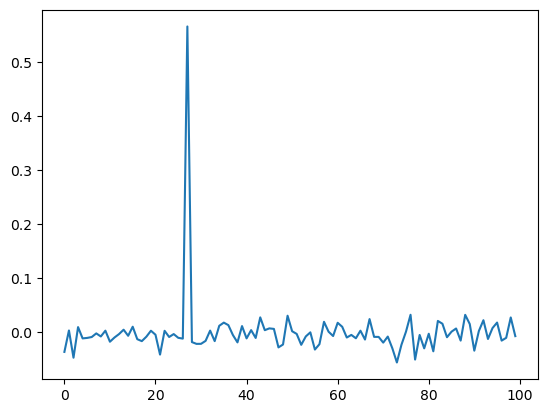

In [31]:
loading = rot.T
word_idx = words.index('topic')
pyplot.plot(loading[:, word_idx])

In [34]:
topic_idx = loading[:, word_idx].argmax()
topic_idx

27

In [42]:
topic = pd.DataFrame({'word' : words, 'loading' : loading[topic_idx]})
topic.sort_values('loading').tail()

,word,loading
1988,words,0.215588
1003,lda,0.224917
541,documents,0.225140
1862,topics,0.273106
1861,topic,0.566290


In [45]:
doc_topics = svd.transform(x)
print(doc_topics.shape)
doc_topics = doc_topics @ rotator.rotation_

(3920, 100)


In [37]:
doc_topics[:, topic_idx]

array([ 0.04513653, -0.02398903,  0.02458688, ...,  0.01771896,
       -0.01505735,  0.03134085])

In [39]:
year_topic = pd.DataFrame({'year': df.year, 'topic': doc_topics[:, topic_idx]})
year_topic.groupby('year').agg('mean')

,topic
year,
2007,0.025189
2008,0.016155
2009,0.019187
2010,0.013317
2011,0.010558
2012,0.016707
2013,0.015346
2014,0.014001
2015,0.009028
